In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Ivanovich data
df_Ivan = pd.DataFrame({
    'E_alpha': [5.07, 6.64, 8.20, 9.76, 10.92],
    'd0': [-46.2, -57.1, -64.6, -56.3, -65.6],
    'd1+': [153.6, 146.7, 140.1, 138.4, 129.9],
    'd1-': [150.2, 144.9, 135.2, 133.5, 124.1],
    'd2+': [-1.1, -2.2, -3.6, -5.3, -6.8],
    'd2-': [-1.1, -2.2, -3.6, -5.3, -6.8],
    'd3+': [78.1, 173.4, 173.8, 171.8, 174.0],
    'd3-': [3.3, 5.1, 21.6, 76.3, 121.5]
})

m_a = 4.002603254 
m_t = 3.016049281
mu_emp = (m_a*m_t)/(m_a+m_t)
mu_rou = (4*3)/(4+3)

df_Ivan[ 'E_emp' ] = df_Ivan[ 'E_alpha' ] * mu_emp/m_a
df_Ivan[ 'E_rou' ] = df_Ivan[ 'E_alpha' ] * mu_rou/4

df_Ivan

,E_alpha,d0,d1+,d1-,d2+,d2-,d3+,d3-,E_emp,E_rou
0,5.07,-46.2,153.6,150.2,-1.1,-1.1,78.1,3.3,2.178676,2.172857
1,6.64,-57.1,146.7,144.9,-2.2,-2.2,173.4,5.1,2.853335,2.845714
2,8.20,-64.6,140.1,135.2,-3.6,-3.6,173.8,21.6,3.523697,3.514286
3,9.76,-56.3,138.4,133.5,-5.3,-5.3,171.8,76.3,4.194059,4.182857
4,10.92,-65.6,129.9,124.1,-6.8,-6.8,174.0,121.5,4.692533,4.680000


# Compare fitted potentials to phase-shift data

In [4]:
# Read .dep file

def df_from_dep(name:str):
    with open(name) as f:
        lines = [line.replace('D', 'E') for line in f]
    
    from io import StringIO
    data = StringIO("".join(lines))
    
    df = pd.read_csv(data, sep=r'\s+', header=None)
    assert df.shape[1] == 4, f"Error: el DataFrame tiene {df.shape[1]} columnas, se esperaban 4."
    
    df.columns = ['E_MeV', 'phase_rad', 'dp/dE', 'ftan']
    
    # d1 : phaseshift (in radian)
    # d2 : numerical derivative of the phaseshift with energy, obtained with a Simpson method (in rad/MeV)
    # d3 : function of the phaseshift that enables one to infer the scattering lenth ( -tan(delta_lj)/k^(2l+1) )

    df['phase_deg'] = df['phase_rad']*180/np.pi

    return df

<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ekici\AppData\Local\Temp\ipykernel_45244\2856029957.py:9: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(G_emp["E_MeV"], G_emp["phase_deg"]+180, label='Boscos w/ R est $\delta+180º$')
C:\Users\ekici\AppData\Local\Temp\ipykernel_45244\2856029957.py:10: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(G_empX["E_MeV"], G_empX["phase_deg"]+180, label='Boscos w/ R emp $\delta+180º$')


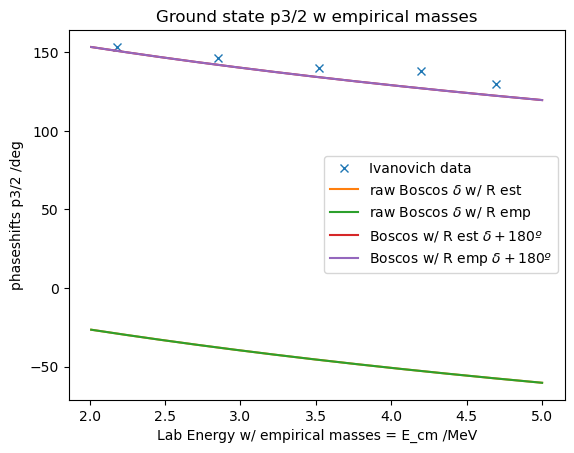

In [5]:
# Ground state p3/2 with empirical masses
plt.plot(df_Ivan["E_emp"], df_Ivan["d1+"], 'x', label='Ivanovich data')
G_emp = df_from_dep("Li7compGeki.dep")
G_empX = df_from_dep("Li7compGekX.dep")

plt.plot(G_emp["E_MeV"], G_emp["phase_deg"], label=r'raw Boscos $\delta$ w/ R est')
plt.plot(G_empX["E_MeV"], G_empX["phase_deg"], label=r'raw Boscos $\delta$ w/ R emp')

plt.plot(G_emp["E_MeV"], G_emp["phase_deg"]+180, label='Boscos w/ R est $\delta+180º$')
plt.plot(G_empX["E_MeV"], G_empX["phase_deg"]+180, label='Boscos w/ R emp $\delta+180º$')

plt.title("Ground state p3/2 w empirical masses")
plt.xlabel("Lab Energy w/ empirical masses = E_cm /MeV")
plt.ylabel("phaseshifts p3/2 /deg")
plt.legend()

<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ekici\AppData\Local\Temp\ipykernel_45244\2492108766.py:9: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(G_rou_M["E_MeV"], G_rou_M["phase_deg"]+180, label='Boscos w/ R emp $\delta+180º$')
C:\Users\ekici\AppData\Local\Temp\ipykernel_45244\2492108766.py:10: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(G_rou_RM["E_MeV"], G_rou_RM["phase_deg"]+180, label='Boscos w/ R WS $\delta+180º$')


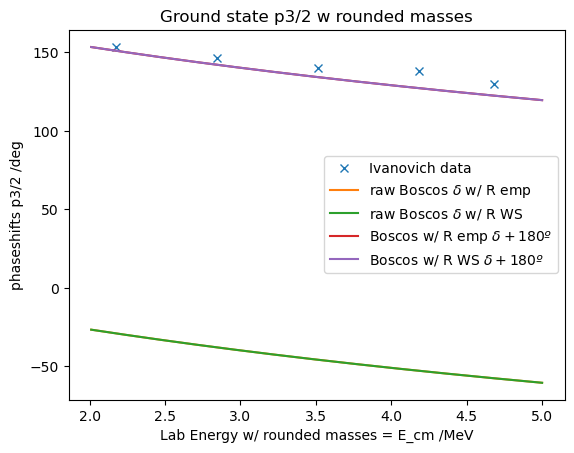

In [6]:
# Ground state p3/2 with rounded masses
plt.plot(df_Ivan["E_rou"], df_Ivan["d1+"], 'x', label='Ivanovich data')
G_rou_M = df_from_dep("Li7compGpieM.dep")
G_rou_RM = df_from_dep("Li7compGpieRM.dep")

plt.plot(G_rou_M["E_MeV"], G_rou_M["phase_deg"], label=r'raw Boscos $\delta$ w/ R emp')
plt.plot(G_rou_RM["E_MeV"], G_rou_RM["phase_deg"], label=r'raw Boscos $\delta$ w/ R WS')

plt.plot(G_rou_M["E_MeV"], G_rou_M["phase_deg"]+180, label='Boscos w/ R emp $\delta+180º$')
plt.plot(G_rou_RM["E_MeV"], G_rou_RM["phase_deg"]+180, label='Boscos w/ R WS $\delta+180º$')

plt.title("Ground state p3/2 w rounded masses")
plt.xlabel("Lab Energy w/ rounded masses = E_cm /MeV")
plt.ylabel("phaseshifts p3/2 /deg")
plt.legend()

<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ekici\AppData\Local\Temp\ipykernel_45244\3355288722.py:9: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(E_emp["E_MeV"], E_emp["phase_deg"]+180, label='Boscos w/ R est $\delta+180º$')
C:\Users\ekici\AppData\Local\Temp\ipykernel_45244\3355288722.py:10: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(E_empX["E_MeV"], E_empX["phase_deg"]+180, label='Boscos w/ R emp $\delta+180º$')


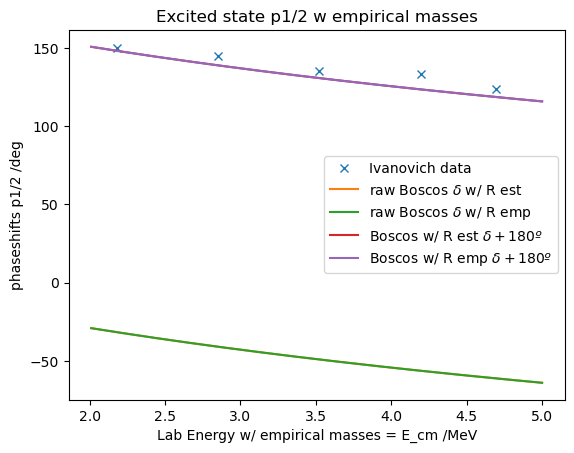

In [7]:
# Excited state p1/2 with empirical masses
plt.plot(df_Ivan["E_emp"], df_Ivan["d1-"], 'x', label='Ivanovich data')
E_emp = df_from_dep("Li7compEeki.dep")
E_empX = df_from_dep("Li7compEekX.dep")

plt.plot(E_emp["E_MeV"], E_emp["phase_deg"], label=r'raw Boscos $\delta$ w/ R est')
plt.plot(E_empX["E_MeV"], E_empX["phase_deg"], label=r'raw Boscos $\delta$ w/ R emp')

plt.plot(E_emp["E_MeV"], E_emp["phase_deg"]+180, label='Boscos w/ R est $\delta+180º$')
plt.plot(E_empX["E_MeV"], E_empX["phase_deg"]+180, label='Boscos w/ R emp $\delta+180º$')

plt.title("Excited state p1/2 w empirical masses")
plt.xlabel("Lab Energy w/ empirical masses = E_cm /MeV")
plt.ylabel("phaseshifts p1/2 /deg")
plt.legend()

<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ekici\AppData\Local\Temp\ipykernel_45244\2125993288.py:9: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(E_rou_M["E_MeV"], E_rou_M["phase_deg"]+180, label='Boscos w/ R emp $\delta+180º$')
C:\Users\ekici\AppData\Local\Temp\ipykernel_45244\2125993288.py:10: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(E_rou_RM["E_MeV"], E_rou_RM["phase_deg"]+180, label='Boscos w/ R WS $\delta+180º$')


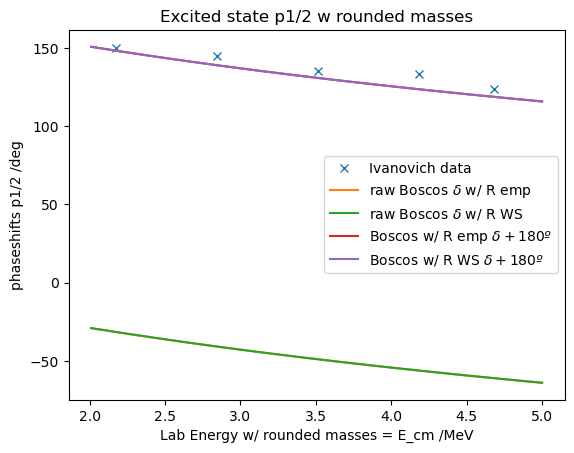

In [8]:
# Excited state p1/2 with rounded masses
plt.plot(df_Ivan["E_rou"], df_Ivan["d1-"], 'x', label='Ivanovich data')
E_rou_M = df_from_dep("Li7compEpieM.dep")
E_rou_RM = df_from_dep("Li7compEpieRM.dep")

plt.plot(E_rou_M["E_MeV"], E_rou_M["phase_deg"], label=r'raw Boscos $\delta$ w/ R emp')
plt.plot(E_rou_RM["E_MeV"], E_rou_RM["phase_deg"], label=r'raw Boscos $\delta$ w/ R WS')

plt.plot(E_rou_M["E_MeV"], E_rou_M["phase_deg"]+180, label='Boscos w/ R emp $\delta+180º$')
plt.plot(E_rou_RM["E_MeV"], E_rou_RM["phase_deg"]+180, label='Boscos w/ R WS $\delta+180º$')

plt.title("Excited state p1/2 w rounded masses")
plt.xlabel("Lab Energy w/ rounded masses = E_cm /MeV")
plt.ylabel("phaseshifts p1/2 /deg")
plt.legend()

## Conclusions

#### The difference in phaseshift because change in radius, compared for same masses and state, qualitatilevy is negligible.

# Measure difference of phaseshift caused because change in radius

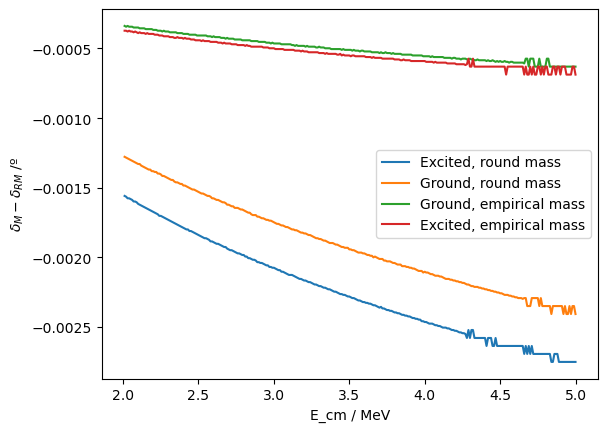

In [38]:
# All .dep have same column for E_MeV

plt.plot(E_rou_M["E_MeV"], E_rou_M["phase_deg"]-E_rou_RM["phase_deg"], label='Excited, round mass')
plt.plot(G_rou_M["E_MeV"], G_rou_M["phase_deg"]-G_rou_RM["phase_deg"], label='Ground, round mass')
plt.plot(G_emp["E_MeV"], G_emp["phase_deg"]-G_empX["phase_deg"], label='Ground, empirical mass')
plt.plot(E_emp["E_MeV"], E_emp["phase_deg"]-E_empX["phase_deg"], label='Excited, empirical mass')

plt.xlabel("E_cm / MeV")
plt.ylabel(r"$\delta_{M}-\delta_{RM}$ /º")
plt.legend()

## Conclusions

#### The difference between phaseshifts of **round** masses and different radius is of 0.002-> in order 10^-3 where data is in order 10^2 -> 10^-5 relative error -> **INSIGNIFICANT**

#### The difference between phaseshifts of **estimated** masses and different radius is of 0.0004 -> in order 10^-4 where data is in order 10^2 -> 10^-6 relative error -> **INSIGNIFICANT**

# Try to determine the "best" convention

As we have seen, the choice of convetion doesn't produce significant change in phaseshift. 

But inside the very small variations, we can still define a smallest distance.

Check manually for each of 5 Ivanovich data points the curve with smaller distance to it

4.6925329305420584


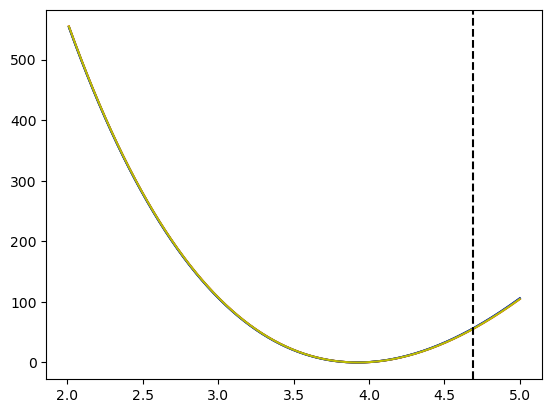

In [11]:
# Ground state best fit
%matplotlib inline
# %matplotlib qt

for i, (E, d) in enumerate(zip(df_Ivan['E_emp'], df_Ivan['d1+'])):
    if i ==4:
        desv_emp = ( d- G_emp["phase_deg"]-180 )**2
        desv_rou_M = ( d- G_rou_M["phase_deg"]-180 )**2
        desv_rou_RM = ( d- G_rou_RM["phase_deg"]-180 )**2
        desv_empX = ( d- G_empX["phase_deg"]-180 )**2
        
        plt.plot(G_emp["E_MeV"], desv_emp, color='r', label=str(d))
        plt.plot(G_rou_M["E_MeV"], desv_rou_M, color='g', label=str(d))
        plt.plot(G_rou_M["E_MeV"], desv_rou_RM, color='b', label=str(d))
        plt.plot(G_rou_M["E_MeV"], desv_empX, color='y', label=str(d))
        plt.axvline(x=E, color='k', linestyle='--')
        print(E)

# 2.178676003465956 : yellow, red, blue, green
# 2.8533350420145847 : yellow, red, blue, green
# 3.523696889234879 : yellow, red, blue, green
# 4.194058736455173 : yellow, red, blue, green
# 4.6925329305420584 : yellow, red, blue, green

# The empirical masse is closer to given data:
# Effect of radius is very small, larger radius better

4.6925329305420584


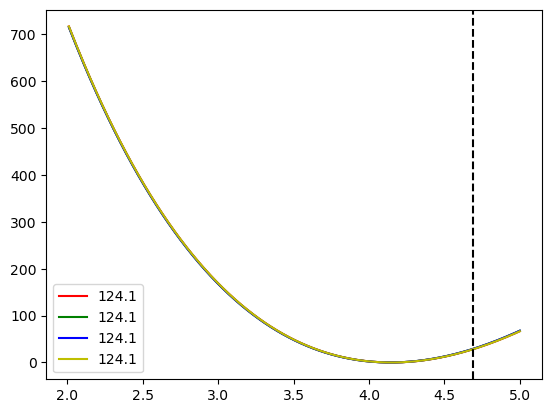

In [12]:
# Excited state best fit
%matplotlib inline
# %matplotlib qt

for i, (E, d) in enumerate(zip(df_Ivan['E_emp'], df_Ivan['d1-'])):
    if i ==4:
        desv_emp = ( d- E_emp["phase_deg"]-180 )**2
        desv_rou_M = ( d- E_rou_M["phase_deg"]-180 )**2
        desv_rou_RM = ( d- E_rou_RM["phase_deg"]-180 )**2
        desv_empX = ( d- E_empX["phase_deg"]-180 )**2
        
        plt.plot(E_emp["E_MeV"], desv_emp, color='r', label=str(d))
        plt.plot(E_rou_M["E_MeV"], desv_rou_M, color='g', label=str(d))
        plt.plot(E_rou_M["E_MeV"], desv_rou_RM, color='b', label=str(d))
        plt.plot(E_rou_M["E_MeV"], desv_empX, color='y', label=str(d))
        plt.axvline(x=E, color='k', linestyle='--')
        print(E)
plt.legend()
# 2.178676003465956 : yellow, red, blue, green
# 2.8533350420145847 : yellow, red, blue, green
# 3.523696889234879 : yellow, red, blue, green
# 4.194058736455173 : yellow, red, blue, green
# 4.6925329305420584 : yellow, red, blue, green

# The empirical masses better :3

## Conclusions

#### Consistently empirical masses and empirical radius is closer to Ivanovich data. Recall that this result might not be meaningful.

# $S_{1/2}$ phaseshift by Tokimoto parameters

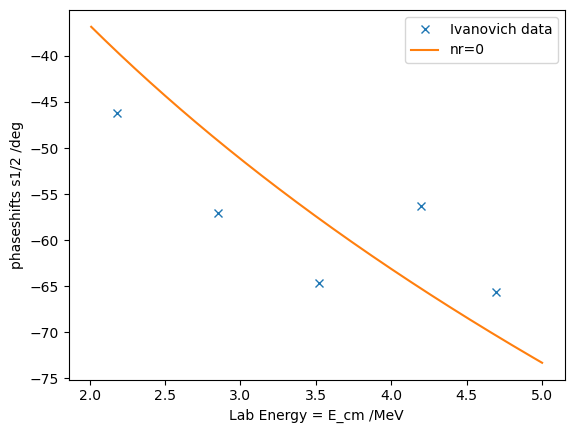

In [14]:
plt.plot(df_Ivan["E_emp"], df_Ivan["d0"], 'x', label='Ivanovich data')
Toki_ps0 = df_from_dep("Li7compTokiS0.dep")
Toki_ps1 = df_from_dep("Li7compTokiS1.dep")
Toki_ps2 = df_from_dep("Li7compTokiS2.dep")
Toki_ps3 = df_from_dep("Li7compTokiS3.dep")

plt.plot(Toki_ps0["E_MeV"], Toki_ps0["phase_deg"], label=r'nr=0')
# plt.plot(Toki_ps1["E_MeV"], Toki_ps1["phase_deg"], label=r'nr=1')
# plt.plot(Toki_ps2["E_MeV"], Toki_ps2["phase_deg"], label=r'nr=2')
# plt.plot(Toki_ps3["E_MeV"], Toki_ps3["phase_deg"], label=r'nr=3')

plt.xlabel("Lab Energy = E_cm /MeV")
plt.ylabel("phaseshifts s1/2 /deg")
plt.legend()

# for all NR the phaseshifts are equal -> ?????
# ANS (by Mónica): s1/2 is a continuum state not bound, NR shouldn't matter

## Conclusions

#### Inside the considerations (as errorbars ain't known), Tokimoto's potential for s-wave reproduces quite well Ivanovich data.

# Wavefunctions for different conventions

In [16]:
def df_from_dfo(name:str):

    with open(name) as f:
        lines = [line.replace('D', 'E') for line in f]

    from io import StringIO
    data = StringIO("".join(lines))

    df = pd.read_csv(data, sep=r'\s+', header=None)
    assert df.shape[1] == 4, f"Error: el DataFrame tiene {df.shape[1]} columnas, se esperaban 4."

    df.columns = ['r_fm', 'u', 'asympBehav', 'Veff']

    return df

Text(0.5, 1.0, 'Wavefunction of Ground state p3/2 for different conventions')

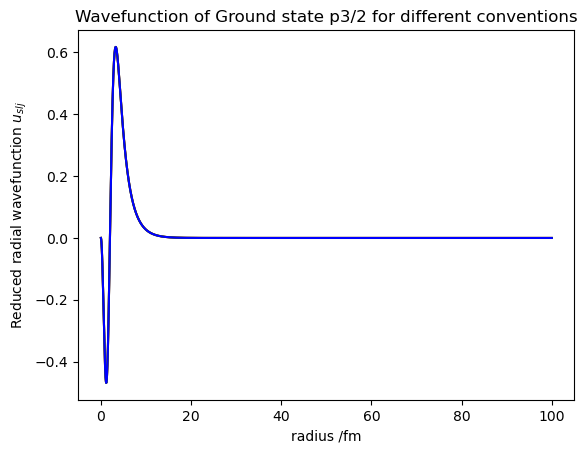

In [17]:
# Ground state
%matplotlib inline
# %matplotlib qt
df_Gemem = df_from_dfo("Li7compGekX.dfo")
df_Gemes = df_from_dfo("Li7compGeki.dfo")
df_Groem = df_from_dfo("Li7compGpieM.dfo")
df_Grows = df_from_dfo("Li7compGpieRM.dfo")

plt.plot(df_Gemem['r_fm'], df_Gemem['u'], label='empirical M + empirical R', c='y')
plt.plot(df_Gemes['r_fm'], df_Gemes['u'], label='empirical M + estimated R', c='r')
plt.plot(df_Groem['r_fm'], df_Groem['u'], label='rounded M + empirical R', c='g')
plt.plot(df_Grows['r_fm'], df_Grows['u'], label='rounded M + Woods-Saxon R', c='b')
plt.xlabel('radius /fm')
plt.ylabel(r'Reduced radial wavefunction $u_{slj}$')
plt.title('Wavefunction of Ground state p3/2 for different conventions')

Text(0.5, 1.0, 'Wavefunction of Excited state p1/2 for different conventions')

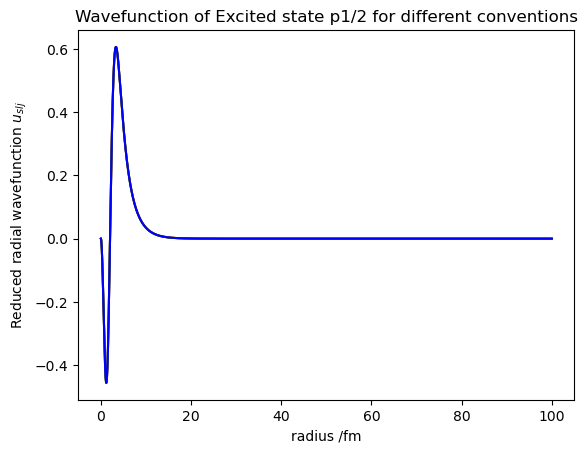

In [18]:
# Excited state
%matplotlib inline
# %matplotlib qt
df_Eemem = df_from_dfo("Li7compEekX.dfo")
df_Eemes = df_from_dfo("Li7compEeki.dfo")
df_Eroem = df_from_dfo("Li7compEpieM.dfo")
df_Erows = df_from_dfo("Li7compEpieRM.dfo")

plt.plot(df_Eemem['r_fm'], df_Eemem['u'], label='empirical M + empirical R', c='y')
plt.plot(df_Eemes['r_fm'], df_Eemes['u'], label='empirical M + estimated R', c='r')
plt.plot(df_Eroem['r_fm'], df_Eroem['u'], label='rounded M + empirical R', c='g')
plt.plot(df_Erows['r_fm'], df_Erows['u'], label='rounded M + Woods-Saxon R', c='b')
plt.xlabel('radius /fm')
plt.ylabel(r'Reduced radial wavefunction $u_{slj}$')
plt.title('Wavefunction of Excited state p1/2 for different conventions')